# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
df = pd.read_csv("airbnbListingsData.csv")
df.head()


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I have chosen is the dataset containing information about Airbnb listings.
2. My goal is to predict the price of these Airbnb listings, therefore, the 'price' column would be the label.
3. Since we are provided with the label, I would say this is a supervised learning problem, and also a regression problem because I am predicting numerical values for the price of the listings. The features I am currently considering are features I believe would most impact the pricing of the listing. From a host's perspective, features like the number of bedrooms and amenities would be most important, while a consumer would most likely consider the minimum nights available or review score ratings. 
4. These are the current features I am considering: 'neighborhood_overview', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'instant_bookable', 'n_host_verifications'.
5. This is an important problem because optimizing the pricing of the Airbnb listing is crucial to the business model of Airbnb. If Airbnb doesn't have fair prices for their listings, then there could be situations where the pricing is consumer-sided so the host doesn't earn enough money, they would no longer posts on Airbnb, and Airbnb doesn't earn any service revenue. Or, the alternative where the pricing is host-sided so the consumer would overpay and uses other cheaper platform competitors over Airbnb, also causing a reduction in revenue for Airbnb. Therefore, optimizing a mid-point to encourage competitive pricing among hosts while also keeping the prices fair for the consumer would lead to more business for Airbnb and subsequently more revenue.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [11]:
print("Number of rows: \n", df.shape[0])
print("Number of columns: \n", df.shape[1])
print("Name of columns: \n", df.columns)
print("Label column: \n", df['price'])

# Print data types for columns
print(df.dtypes)

# Check missing values
missing_vals = df.isnull().sum()
print("Missing values for each column: \n", missing_vals)

# Check how many values are in the categorical features
category_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", category_cols)
for cat in category_cols:
    print(f"Category {cat} has {df[cat].nunique()} values")

# Check for feature correlation to label
corr_matrix = df.corr()
price_corr_col = corr_matrix['price']
sorted_price_corr = price_corr_col.sort_values(ascending=False)
print(sorted_price_corr)

# Identify multicollinearity
availability_60_corr_col = corr_matrix['availability_60']
sorted_availability_60_col = availability_60_corr_col.sort_values(ascending=False)
print(sorted_availability_60_col)

print(df.describe())

Number of rows: 
 28022
Number of columns: 
 50
Name of columns: 
 Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_comm

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, I do have a new feature list now. From the feature list that I originally came up with in part 3 based on my intuiton, I will remove several columns. I will remove 'host_response_rate', 'host_acceptance_rate', and 'neighborhood_overview' because they had too many missing values, which can negatively impact the performance of the models I want to train. Additionally, for the two categorical columns I selected, I will remove the 'amenities' column because it had too many unique values, which would be difficult to one-hot encode, and I will one-hot encode the 'room_type' column since there were only 4 unique types of rooms. Lastly, when analyzing the feature correlation with the 'price' column, I noticed that features such as accommodates, bedrooms, bathrooms, and beds have the most correlation, which means they are crucial to be included in my final feature list. Also, I noticed the following most significant features were availability_60, availability_90, availability_30, and availability_365, in order. Upon further review on the these availability features, I noticed there was high multicollinearity between them, which could skew my model's predictions, therefore, I only kept the availability_60 feature and removed the rest.
2. For the numerical features I will handle the missing values in the features with the mean of each column, use winsorization to remove the top and bottom 1% outliers, and scale the features to ensure they have a similar scale. For the categorical features, I will remove the features with too many unique values and one-hot encode the rest to a numerical format. Lastly, I will remove the features with too many missing values.
3. The models I want to train for this regression problem is a neural network and a random forest model.
4. First, I will split the dataset into a training, validation, and test set with a split of 70%, 15%, and 15% respectively. Then, I will train the initial versions of each model, such as compiling the neural network with a loss function and optimizer and running a random forest model with default parameters. Next, I will evaluate the performance of these initial models using metrics like root mean squared error. Once the initial models have finished, I will perform hyperparameter tuning on the models to find the optimal settings to improve model performance. For the neural network and random forest, I would use techniques like grid search and random search to find the best combination of their hyperparameters. Next, I would analyze the performance of these models compared to their baseline initial models and to each other on the testing set. The regression metric I would most likely use for this is the Root Mean Squared Error because it punishes outliers and more erroneous points more. After establishing which models performed the best, I would stop executing the worst performing model type and perform more extensive hyperparameter tuning with more values for the remaining model. Lastly, I would take the model with optimal parameters and with the best performance on the testing set as my final model. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [12]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import tensorflow.keras as keras
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [13]:
# Prepare data for models
# Features I selected in step 2
features = ['neighborhood_overview', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'instant_bookable', 'n_host_verifications']

# Remove features have too many missing values
features.remove('host_response_rate')
features.remove('host_acceptance_rate')
features.remove('neighborhood_overview')

# Remove features with multicollinearity
features.remove('availability_90')
features.remove('availability_30')
features.remove('availability_365')
df = df[features + ['price']]

# Extract numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('price') # don't modify labels
print("Numerical columns: ", num_cols)

# Replace all missing values of the numerical features with mean of column
for f in num_cols:
    df[f].fillna(np.mean(df[f]), inplace=True)
updatedMissingVals = df.isnull().sum()
print("Missing values for features after removing features with significant missing values and replacing missing values with mean of column: \n", updatedMissingVals)

# Apply winsorization to remove top and bottom 1% outliers
for col in num_cols:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])

# Normalize the numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Extract categorical columns
category_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", category_cols)
for cat in category_cols:
    print(f"Category {cat} has {df[cat].nunique()} values")
    
# Amenities column has too many unique values
df.drop(columns='amenities', inplace=True)

# Apply one hot encoding to the 'room_type' column
df_room_type = pd.get_dummies(df['room_type'], prefix='room_type_')

# Add the one-hot encoded columns of 'room_type' to df and drop 'room_type' column
df = df.join(df_room_type)
df.drop(columns='room_type', inplace=True)

# Final selection of features for df
print("Columns in df are now: \n", df.columns)


Numerical columns:  ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'availability_60', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'n_host_verifications']
Missing values for features after removing features with significant missing values and replacing missing values with mean of column: 
 room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
calculated_host_listings_count    0
availability_60                   0
number_of_reviews 

In [14]:
X = df.drop(columns=['price'])
y = df['price']
# 70-30 split between training set and validation/test set
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=123)
# 50-50 split between validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=1234)
# Convert all entries to float
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(19615, 25)
(19615,)
(4203, 25)
(4203,)
(4204, 25)
(4204,)


In [15]:
# Base Random Forest Model
base_rf = RandomForestRegressor(n_estimators=100, random_state=40)
base_rf.fit(X_train, y_train)
# Evaluate the best model on the validation set
base_rf_val_predictions = base_rf.predict(X_val)
base_rf_val_mse = mean_squared_error(y_val, base_rf_val_predictions)
base_rf_val_rmse = np.sqrt(base_rf_val_mse)
base_rf_val_mae = mean_absolute_error(y_val, base_rf_val_predictions)
base_rf_val_r2 = r2_score(y_val, base_rf_val_predictions)

print(f"Base Random Forest Validation MSE: {base_rf_val_mse}")
print(f"Base Random Forest Validation MAE: {base_rf_val_mae}")

Base Random Forest Validation MSE: 9429.686317519247
Base Random Forest Validation MAE: 55.924076128367076


In [16]:
param_grid = {'n_estimators':[100, 300], 'max_features':['sqrt', 'log2'], 'max_depth':[None, 10, 50], 'min_samples_split': [2, 10], 'min_samples_leaf':[1,4]}

rf_model = RandomForestRegressor(random_state=40)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
rf_val_predictions = best_model.predict(X_val)
rf_val_mse = mean_squared_error(y_val, rf_val_predictions)
rf_val_mae = mean_absolute_error(y_val, rf_val_predictions)
rf_val_r2 = r2_score(y_val, rf_val_predictions)

print(f"Optimized Random Forest Validation MSE: {rf_val_mse}")
print(f"Optimized Random Forest Validation MAE: {rf_val_mae}")

Optimized Random Forest Validation MSE: 8989.712682235508
Optimized Random Forest Validation MAE: 53.96415869628924


In [17]:
print("Best Parameters for optimal RF model: ", grid_search.best_params_)
summary_stats = df['price'].describe()
print("Summary Statistics:\n", summary_stats)

Best Parameters for optimal RF model:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Summary Statistics:
 count    28022.000000
mean       154.228749
std        140.816605
min         29.000000
25%         70.000000
50%        115.000000
75%        180.000000
max       1000.000000
Name: price, dtype: float64


In the previous few code cells, I trained a base Random Forest model with only one parameter, n_estimators=100, to establish a baseline performance. Then, I used GridSearch and five-fold cross validation to train multiple Random Forest models to find the optimal parameters to use on n_estimators, max_features, max_depth, min_samples_split, and min_samples_leaf. From the previous code cell, we can see that the best parameters for the random forest model have a max depth of 50, max features of sqrt, min samples leaf of 1, min samples split of 2, and n estimators of 300. 

Further, we can see that this RF model does perform noticeably better than the base model. For instance, the MSE decreased from 9429.69 to 8989.71, indicating a reduction in the average squared prediction error. Additionally, we can observe that the MAE reduces from 55.92 to 53.96, which means that the model is now off by an average of 54 dollars compared to 56 dollars  when predicting the true price of an Airbnb listing. 

Although the performance of the model did improve, this might not be sufficient enough to predict these listings accurately when analyzing the summary statistics. The statistics show us that the mean of the listing prices is 154 dollars, so an error off by 54 dollars could be substantial because this means we predict around 33% off the true pricing on average. Therefore, I will try to optimize our regression metrics through the use of neural networks.

In [18]:
# Create base neural network model obj
nn_model = Sequential()

# Construct input layer
input_layer = InputLayer(input_shape=(25,), name='input')
nn_model.add(input_layer)

# Construct hidden layer 1
hidden_layer_1 = Dense(units=64, activation='relu', name='h1_1')
nn_model.add(hidden_layer_1)

# Construct hidden layer 2
hidden_layer_2 = Dense(units=32, activation='relu', name='h1_2')
nn_model.add(hidden_layer_2)

# Construct hidden layer 3
hidden_layer_3 = Dense(units=16, activation='relu', name='h1_3')
nn_model.add(hidden_layer_3)

# Construct Output layer 
output_layer = Dense(units=1, activation='linear', name='output') 
nn_model.add(output_layer)

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1_1 (Dense)                 (None, 64)                1664      
_________________________________________________________________
h1_2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
h1_3 (Dense)                 (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


2024-08-02 22:29:55.883336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-02 22:29:55.883384: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-02 22:29:55.883456: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0014727b9e651e2a0): /proc/driver/nvidia/version does not exist
2024-08-02 22:29:55.883707: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Logger function to output loss and accuracy every 50 epochs
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [20]:
# Define optimization algorithm (Adam)
adam_optimizer = Adam(learning_rate=0.001)

# Define loss function
loss_fn = keras.losses.MeanSquaredError()

# Compile model
nn_model.compile(optimizer=adam_optimizer, loss=loss_fn, metrics=[keras.metrics.MeanAbsoluteError()])
            
# Record time to fit model            
start_time = time.time() 

num_epochs = 500 # number of epochs

history = nn_model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    verbose=0,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=50)],
)

stop_time = time.time()

print('Elapsed time: %.2fs' % (stop_time -start_time))

2024-08-02 22:29:56.016558: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-02 22:29:56.019803: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch [50/ 500], Loss: 8595.9688, Mean_absolute_error: 53.7419
Epoch [100/ 500], Loss: 7568.3442, Mean_absolute_error: 51.2684
Epoch [150/ 500], Loss: 6835.9951, Mean_absolute_error: 49.3597
Epoch [200/ 500], Loss: 6269.8740, Mean_absolute_error: 47.8984
Epoch [250/ 500], Loss: 5730.7324, Mean_absolute_error: 46.4938
Epoch [300/ 500], Loss: 5404.5000, Mean_absolute_error: 45.2929
Epoch [350/ 500], Loss: 5099.0117, Mean_absolute_error: 44.4842
Epoch [400/ 500], Loss: 4867.9468, Mean_absolute_error: 43.7041
Epoch [450/ 500], Loss: 4744.7144, Mean_absolute_error: 43.2901
Epoch [500/ 500], Loss: 4606.1685, Mean_absolute_error: 42.6312
Elapsed time: 152.58s


In [21]:
# Evaluate the model on the validation set
val_loss, val_mae = nn_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss}, Validation MAE: {val_mae}")

Validation Loss: 13019.8037109375, Validation MAE: 57.91566467285156


This is the base neural network that I trained with a epoch size of 500, 3 hidden layers, using the Adam optimizer (SGD didn't seem to work for this model), and a mean squared error loss function. From the performance results, we can observe that the MAE for the training set is significantly lower than the MAE on the validation set. This shows that the model is overfitting to the data and isn't learning the underlying patterns in the data. Additionally, this validation MAE result is noticeably worse than the MAE results from the random forest models. Therefore, to improve this metric, we can implement techniques like dropout layers to randomly drop 50% of the neurons and implement L2 regularization to reduce the impact of larger weights.

In [22]:
# Create base neural network model obj
optimal_nn_model = Sequential()

# Construct input layer
optimal_input_layer = InputLayer(input_shape=(25,), name='input')
optimal_nn_model.add(optimal_input_layer)

# Add L2 regularization to the hidden layers
# Construct hidden layer 1
optimal_hidden_layer_1 = Dense(units=64, activation='relu', name='oh1_1', kernel_regularizer=l2(0.001))
optimal_nn_model.add(optimal_hidden_layer_1)
optimal_nn_model.add(Dropout(0.05))

# Construct hidden layer 2
optimal_hidden_layer_2 = Dense(units=32, activation='relu', name='oh1_2', kernel_regularizer=l2(0.001))
optimal_nn_model.add(optimal_hidden_layer_2)
optimal_nn_model.add(Dropout(0.05))

# Construct hidden layer 3
optimal_hidden_layer_3 = Dense(units=16, activation='relu', name='oh1_3', kernel_regularizer=l2(0.001))
optimal_nn_model.add(optimal_hidden_layer_3)
optimal_nn_model.add(Dropout(0.05))

# Construct Output layer 
output_layer = Dense(units=1, activation='linear', name='output')
optimal_nn_model.add(output_layer)

optimal_nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
oh1_1 (Dense)                (None, 64)                1664      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
oh1_2 (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
oh1_3 (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 1)                

In [23]:
# Define optimization algorithm (Adam) - increased learning rate
opt_adam_optimizer = Adam(learning_rate=0.005)

# Define loss function
loss_fn = keras.losses.MeanSquaredError()

# Compile model
optimal_nn_model.compile(optimizer=opt_adam_optimizer, loss=loss_fn, metrics=[keras.metrics.MeanAbsoluteError()])

# Record time to fit model            
start_time = time.time() 

opt_num_epochs = 1000 # increased number of epochs

opt_history = optimal_nn_model.fit(
    X_train,
    y_train,
    epochs=opt_num_epochs,
    verbose=0,
    callbacks=[ProgBarLoggerNEpochs(opt_num_epochs, every_n=100)],
)

stop_time = time.time()

print('Elapsed time: %.2fs' % (stop_time -start_time))

Epoch [100/ 1000], Loss: 7494.1592, Mean_absolute_error: 50.9740
Epoch [200/ 1000], Loss: 6333.9678, Mean_absolute_error: 48.1745
Epoch [300/ 1000], Loss: 5839.1694, Mean_absolute_error: 47.0736
Epoch [400/ 1000], Loss: 5716.4976, Mean_absolute_error: 46.7034
Epoch [500/ 1000], Loss: 5524.2031, Mean_absolute_error: 46.0423
Epoch [600/ 1000], Loss: 5397.8228, Mean_absolute_error: 45.5266
Epoch [700/ 1000], Loss: 5330.4111, Mean_absolute_error: 45.0412
Epoch [800/ 1000], Loss: 5191.0752, Mean_absolute_error: 44.6796
Epoch [900/ 1000], Loss: 5154.3760, Mean_absolute_error: 44.6709
Epoch [1000/ 1000], Loss: 5205.5278, Mean_absolute_error: 44.9657
Elapsed time: 334.08s


In [24]:
# Evaluate the model on the validation set
opt_val_loss, opt_val_mae = optimal_nn_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {opt_val_loss}, Validation MAE: {opt_val_mae}")

Validation Loss: 10502.884765625, Validation MAE: 54.88288879394531


After further testing with the dropout rate and L2 regularization, these were the results I got, in order:

With neural network dropout rate of 0.5 and regularization factor of 0.01: Validation Loss: 11708.697265625, Validation MAE: 61.4821891784668

With neural network dropout rate of 0.25 and regularization factor of 0.005: Validation Loss: 10036.572265625, Validation MAE: 56.602577209472656

With neural network dropout rate of 0.15 and regularization factor of 0.003: Validation Loss: 10216.19140625, Validation MAE: 55.02817916870117

With neural network dropout rate of 0.05 and regularization factor of 0.001: Validation Loss: 10502.884765625, Validation MAE: 54.88288879394531


The results show us that a droput rate of 0.5 and 0.25 are too high and led to underfitting where the training loss and MAE was about the same as the validation loss and MAE. Therefore, I continued to lower the dropout rate and regularization factor to 0.15 and 0.003 to balance the loss the model had between the training and validation sets. Comparing to the random forest model, we notice that the validation MAE for the optimal RF model was around 53 dollars, which is slightly better than the validation MAE we got with the best neural network model.

Therefore, with the two best versions of the random forest and neural network, I will analyze their results on the testing set and graph their results next to each other.

In [26]:
# Evaluate the base random forest model on the testing set
base_rf_test_predictions = base_rf.predict(X_test)
base_rf_test_mae = mean_absolute_error(y_test, base_rf_test_predictions)
print(f"Base Random Forest Test MAE: {base_rf_test_mae}")

# Evaluate the best random forest model on the testing set
rf_test_predictions = best_model.predict(X_test)
rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)
print(f"Optimized Random Forest Test MAE: {rf_test_mae}")

# Evaluate the base neural network model on the testing set
base_nn_test_loss, base_nn_test_mae = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Test MAE: {base_nn_test_mae}")

nn_test_loss, nn_test_mae = optimal_nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Test MAE: {nn_test_mae}")

Base Random Forest Test MAE: 58.22361941187114
Optimized Random Forest Test MAE: 55.70339352631274
Neural Network Test MAE: 57.99898147583008
Neural Network Test MAE: 57.34944152832031


(50.0, 60.0)

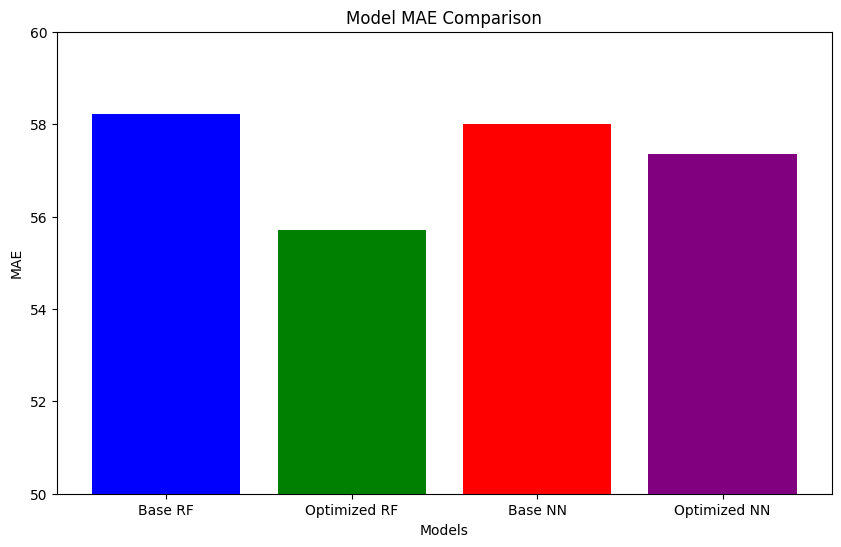

In [29]:
models = ['Base RF', 'Optimized RF', 'Base NN', 'Optimized NN']
mae_vals = [base_rf_test_mae, rf_test_mae, base_nn_test_mae, nn_test_mae]
x = np.arange(len(models))

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x, mae_vals, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Model MAE Comparison')
plt.xticks(x, models)
plt.ylim(50, 60)

In this bar chart, I plotted the regression results that each model has on the mean absolute error. We notice that the optimized versions of each model type has a lower MAE score and, therefore, better performance. Additionally, we notice that the optimized RF performed the best substantially more than the rest of the models. Therefore, we can conclude that random forests are most likely the better model to use for this Airbnb dataset. Some explanations for this might include the more extensive hyperparameter tuning I did for random forests. For instance, the base RF had the worse performance than the base NN, but after many combinations using GridSearch for the hyperparameters of the random forest, I was able to lower the MAE substantially. 

For the neural network, I manually added a few combinations that varied the L2 regularization and the dropout rate for the neurons. Additional testing on the neural networks could be adjusting the epochs used, learning rate, or optimizer used and could make it perform better than the random forest. Lastly, the data preparation stage might have been better suited to the random forest since neural networks might require more feature engineering or need additional information. For instance, in the intial stage, I left out many features because I didn't think they would have a significant impact on price, which might have had a stronger impact than I previously thought. 

In conclusion, the optimized random forest model performed the best with an MAE score of 53.96. This means that on average, our Airbnb price listing predictions are off by around 54 dollars on average. As a base, this is a good score with relatively low error compared to the mean of the target variable being 153.23 and standard deviation of 140.8. However, there can be room for improvement, such as using text vectorization on paragraph features or further preprocessing the most important features for these models, that can bring the MAE below 50.